<a href="https://colab.research.google.com/github/priyanshu3489/Deepfake-detection-/blob/main/Video_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv'

In [ ]:
df = pd.read_csv(dataset_path)
df.head(10)

,File Path,Video-Audio Label,Ethnicity Label,Gender Label,Audio Path
0,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,1,AM,M,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
1,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,AS,M,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
2,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,AM,W,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
3,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,AF,M,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
4,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,EU,W,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
5,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,EU,W,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
6,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,EU,W,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
7,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,AF,W,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
8,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,EU,W,/content/drive/MyDrive/Colab Notebooks/AVCeleb...
9,/content/drive/MyDrive/Colab Notebooks/AVCeleb...,0,AS,W,/content/drive/MyDrive/Colab Notebooks/AVCeleb...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   File Path          2946 non-null   object
 1   Video-Audio Label  2946 non-null   int64 
 2   Ethnicity Label    2946 non-null   object
 3   Gender Label       2946 non-null   object
 4   Audio Path         2946 non-null   object
dtypes: int64(1), object(4)
memory usage: 115.2+ KB


In [ ]:
df.nunique()

,0
File Path,2946
Video-Audio Label,4
Ethnicity Label,5
Gender Label,2
Audio Path,2880


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['File Path', 'Ethnicity Label', 'Gender Label', 'Audio Path'], dtype='object')

Numerical type columns:
Index(['Video-Audio Label'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Ethnicity Label', 'Gender Label']
Non-Categorical Features: ['File Path', 'Audio Path']
Discrete Features: ['Video-Audio Label']
Continuous Features: []


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 1767
Validation set size: 589
Test set size: 590


In [ ]:
print(train_df)

                                              File Path  Video-Audio Label  \
749   /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  0   
1564  /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  1   
1079  /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  0   
1016  /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  1   
2110  /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  1   
...                                                 ...                ...   
137   /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  0   
1878  /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  0   
1249  /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  1   
936   /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  0   
1461  /content/drive/MyDrive/Colab Notebooks/AVCeleb...                  0   

     Ethnicity Label Gender Label  \
749               AM      

In [ ]:
video_dict = dict(zip(train_df['File Path'], train_df['Video-Audio Label']))
print(video_dict)
print(len(video_dict))

{'/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-FakeAudio/Caucasian (American)/men/id00184/00241_id04034_wavtolip.mp4': 0, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/men/id01182/00167_id04216_wavtolip.mp4': 1, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-FakeAudio/Asian (South)/men/id00860/00154_id00414_d3N2NrpGSp0_id06334_wavtolip.mp4': 0, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Asian (East)/women/id06427/00138_id00582_wavtolip.mp4': 1, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/men/id01182/00167_id00775_wavtolip.mp4': 1, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id00190/00072_id00418_wavtolip.mp4': 1, '/content/drive/MyDrive/Colab Notebooks/AV

In [ ]:
for video_id, label in video_dict.items():
    # Construct the full file path
    if label == 0:
      print(f"{video_id}, {label}")
    else:
      print(f"{video_id}, {label}")

/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-FakeAudio/Caucasian (American)/men/id00184/00241_id04034_wavtolip.mp4, 0
/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/men/id01182/00167_id04216_wavtolip.mp4, 1
/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-FakeAudio/Asian (South)/men/id00860/00154_id00414_d3N2NrpGSp0_id06334_wavtolip.mp4, 0
/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Asian (East)/women/id06427/00138_id00582_wavtolip.mp4, 1
/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/men/id01182/00167_id00775_wavtolip.mp4, 1
/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id00190/00072_id00418_wavtolip.mp4, 1
/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAV

**# Construct Train Dataset** (no more run)


In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(train_df['File Path'], train_df['Video-Audio Label']))

# Paths
destination_folder = '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/train_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def copy_videos(video_dict, destination_folder):
    for video_id, label in video_dict.items():
        if os.path.isfile(video_id):
            # Move the video
            shutil.copy(video_id, destination_folder)
            print(f"copied")
        else:
            print(f"Video {video_id} not found!")

# Move the videos
copy_videos(video_dict, destination_folder)


copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied

**# Construct Test Dataset** (no more run)


In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(test_df['File Path'], test_df['Video-Audio Label']))

# Paths
destination_folder = '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/test_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def copy_videos(video_dict, destination_folder):
    for video_id, label in video_dict.items():
        if os.path.isfile(video_id):
            # Move the video
            shutil.copy(video_id, destination_folder)
            print(f"copied")
        else:
            print(f"Video {video_id} not found!")

# Move the videos
copy_videos(video_dict, destination_folder)


copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied

**# Construct Validation Dataset** (no more run)


In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(val_df['File Path'], val_df['Video-Audio Label']))

# Paths
destination_folder = '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/val_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def copy_videos(video_dict, destination_folder):
    for video_id, label in video_dict.items():
        if os.path.isfile(video_id):
            # Move the video
            shutil.copy(video_id, destination_folder)
            print(f"copied")
        else:
            print(f"Video {video_id} not found!")

# Move the videos
copy_videos(video_dict, destination_folder)


copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((1767, 5), (589, 5), (590, 5))

In [ ]:
import cv2
import time

In [ ]:
start_time = time.time()
import cv2
import numpy as np

def load_frames(video_id, frames_dir, num_frames, img_size):
    cap = cv2.VideoCapture(video_id)
    frames = []
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(frame_count // num_frames, 1)

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, img_size)
        frames.append(frame)

    cap.release()

    # Ensure we have exactly num_frames frames
    while len(frames) < num_frames:
        frames.append(np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8))  # Padding with black frames

    frames = np.array(frames[:num_frames])  # Truncate if necessary
    return frames

def create_dataset(df, frames_dir, num_frames=10, img_size=(224, 224)):
    X = []
    y = []
    for index, row in df.iterrows():
        video_id = row['File Path']
        label = row['Video-Audio Label']
        try:
            frames = load_frames(video_id, frames_dir, num_frames, img_size)
            X.append(frames)
            y.append(label)
        except Exception as e:
            print(f"Error loading frames for Video_ID {video_id}: {e}")

    X = np.array(X)
    y = np.array(y)
    return X, y
# Example usage:
# Assuming train_df, val_df, and test_df are your dataframes
X_train, y_train = create_dataset(train_df, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/train_df_videos')
X_val, y_val = create_dataset(val_df, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/test_df_videos')
X_test, y_test = create_dataset(test_df, '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/val_df_videos')

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
# End time
end_time = time.time()

# Execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


In [ ]:
pip install keras-cv


In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, TimeDistributed, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import keras_cv
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Define the CNN-LSTM model with pretrained ResNet and additional improvements
def create_cnn_lstm_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-10]:
        layer.trainable = False

    model = Sequential()
    model.add(TimeDistributed(base_model, input_shape=input_shape))
    model.add(TimeDistributed(Flatten()))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Data augmentation function
def augment_data(image, label):
    augmenter = keras_cv.layers.RandomRotation(factor=0.1)
    image = augmenter(image)
    return image, label

# Define input shape
input_shape = (10, 224, 224, 3)
model = create_cnn_lstm_model(input_shape)

# Print model summary
model.summary()

# Learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

# Compile model
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prepare datasets
batch_size = 2
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(augment_data).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Checkpoint callback
checkpoint = ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True)

# Train model
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[checkpoint])

# End time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

# Plot Accuracy and Loss vs Epoch
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 10, 7, 7, 2048)      │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 10, 100352)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 10, 100352)          │         401,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 10, 256)             │     102,892,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,308,929 (485.65 MB)

 Trainable params: 107,986,177 (411.93 MB)

 Non-trainable params: 19,322,752 (73.71 MB)

Epoch 1/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5263 - loss: 0.7162

884/884 ━━━━━━━━━━━━━━━━━━━━ 202s 144ms/step - accuracy: 0.5263 - loss: 0.7162 - val_accuracy: 0.6129 - val_loss: 0.6242
Epoch 2/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5976 - loss: 0.6493

884/884 ━━━━━━━━━━━━━━━━━━━━ 106s 120ms/step - accuracy: 0.5976 - loss: 0.6493 - val_accuracy: 0.6401 - val_loss: 0.5594
Epoch 3/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6239 - loss: 0.6047

884/884 ━━━━━━━━━━━━━━━━━━━━ 108s 122ms/step - accuracy: 0.6239 - loss: 0.6047 - val_accuracy: 0.7080 - val_loss: 0.5193
Epoch 4/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 104s 117ms/step - accuracy: 0.6221 - loss: 0.6009 - val_accuracy: 0.7182 - val_loss: 0.5488
Epoch 5/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6685 - loss: 0.5665

884/884 ━━━━━━━━━━━━━━━━━━━━ 106s 120ms/step - accuracy: 0.6685 - loss: 0.5665 - val_accuracy: 0.7776 - val_loss: 0.3972
Epoch 6/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7088 - loss: 0.4972

884/884 ━━━━━━━━━━━━━━━━━━━━ 107s 121ms/step - accuracy: 0.7088 - loss: 0.4972 - val_accuracy: 0.7912 - val_loss: 0.3282
Epoch 7/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7062 - loss: 0.4629

884/884 ━━━━━━━━━━━━━━━━━━━━ 106s 120ms/step - accuracy: 0.7062 - loss: 0.4629 - val_accuracy: 0.7963 - val_loss: 0.3002
Epoch 8/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.7030 - loss: 0.4621 - val_accuracy: 0.8115 - val_loss: 0.3352
Epoch 9/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.7043 - loss: 0.4684 - val_accuracy: 0.7691 - val_loss: 0.7144
Epoch 10/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.7202 - loss: 0.2680 - val_accuracy: 0.7504 - val_loss: 0.4959
Epoch 11/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.6847 - loss: 0.2212 - val_accuracy: 0.7216 - val_loss: 1.3380
Epoch 12/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 117ms/step - accuracy: 0.6639 - loss: 0.1492 - val_accuracy: 0.7572 - val_loss: 2.8584
Epoch 13/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.6710 - loss: 0.2051 - val_accuracy: 0.7878 - val_loss: 4.8329
Epoch 14/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.6824 - loss:

884/884 ━━━━━━━━━━━━━━━━━━━━ 105s 119ms/step - accuracy: 0.6866 - loss: -7.2038 - val_accuracy: 0.7453 - val_loss: -4.7752
Epoch 21/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.6783 - loss: -6.3405 - val_accuracy: 0.7334 - val_loss: 24.9648
Epoch 22/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6544 - loss: -17.1059

884/884 ━━━━━━━━━━━━━━━━━━━━ 106s 120ms/step - accuracy: 0.6544 - loss: -17.1038 - val_accuracy: 0.7793 - val_loss: -5.0759
Epoch 23/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.6330 - loss: -6.8974 - val_accuracy: 0.7284 - val_loss: -0.7911
Epoch 24/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.6309 - loss: -6.7178 - val_accuracy: 0.6689 - val_loss: 71.4097
Epoch 25/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 103s 117ms/step - accuracy: 0.6593 - loss: -17.6965 - val_accuracy: 0.7216 - val_loss: 21.9657
Epoch 26/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6537 - loss: -19.5140

884/884 ━━━━━━━━━━━━━━━━━━━━ 106s 120ms/step - accuracy: 0.6537 - loss: -19.5178 - val_accuracy: 0.7436 - val_loss: -13.6453
Epoch 27/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6550 - loss: -35.7236

884/884 ━━━━━━━━━━━━━━━━━━━━ 107s 120ms/step - accuracy: 0.6550 - loss: -35.7198 - val_accuracy: 0.7419 - val_loss: -41.9799
Epoch 28/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 104s 117ms/step - accuracy: 0.6344 - loss: -28.5552 - val_accuracy: 0.7267 - val_loss: 73.2838
Epoch 29/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6088 - loss: -13.6616

884/884 ━━━━━━━━━━━━━━━━━━━━ 106s 120ms/step - accuracy: 0.6088 - loss: -13.6695 - val_accuracy: 0.7606 - val_loss: -42.3997
Epoch 30/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 105s 119ms/step - accuracy: 0.6035 - loss: -24.9023 - val_accuracy: 0.7182 - val_loss: 19.2686
Execution time: 3241.5778884887695 seconds


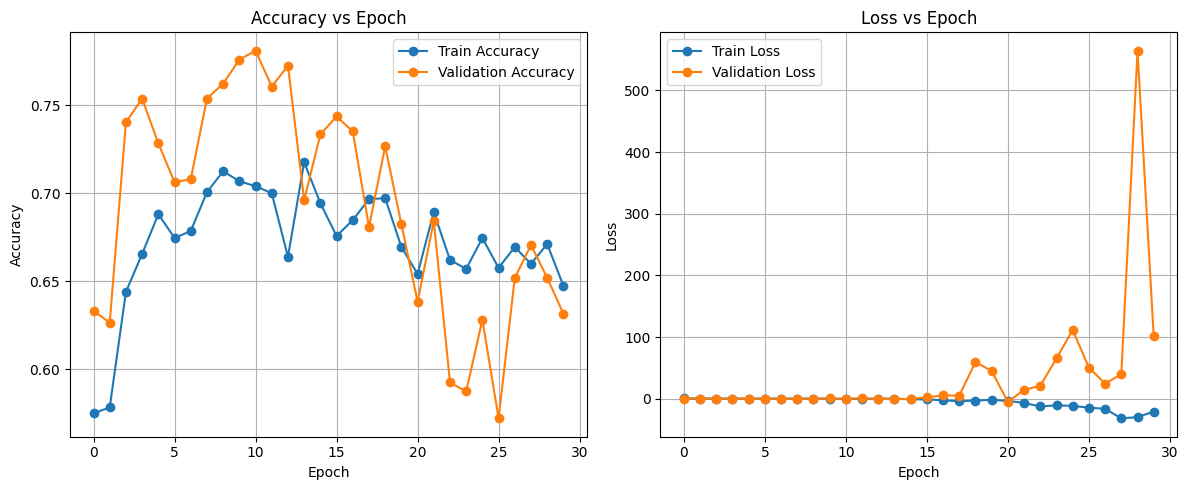

In [ ]:
# Plot Accuracy and Loss vs Epoch
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
pip install scipy==1.9.3


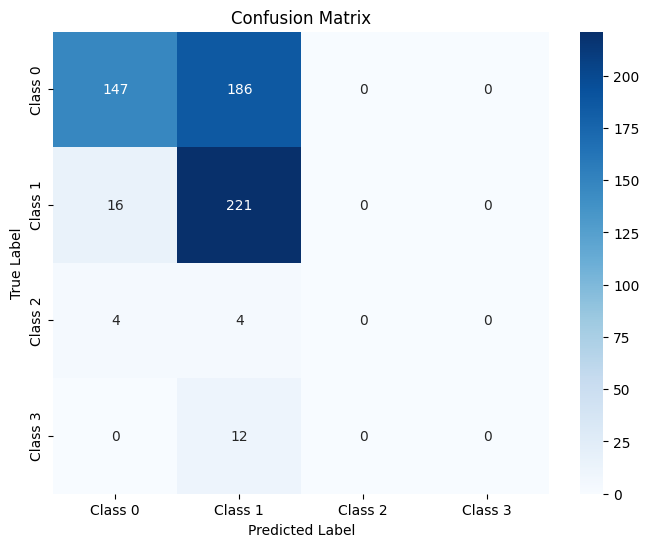

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred_binary, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred_binary, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred_binary, average='weighted', zero_division=0)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.7067
Recall: 0.6237
F1 Score: 0.6009


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
print(dict(zip(np.unique(y_train), class_weights)))


{0: 0.45122574055158327, 1: 0.6043091655266758, 2: 15.776785714285714, 3: 15.232758620689655}


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_binary, zero_division=0))


              precision    recall  f1-score   support

           0       0.88      0.44      0.59       333
           1       0.52      0.93      0.67       237
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12

    accuracy                           0.62       590
   macro avg       0.35      0.34      0.31       590
weighted avg       0.71      0.62      0.60       590

